<a href="https://colab.research.google.com/github/TarelkinaAnastasia/DB-project/blob/main/Sieve%20of%20Atkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import sqrt, ceil, pow

class SieveOfAtkin:
	def __init__(self, limit):
		self.limit = limit		
		self.primes = []	
		self.sieve = [False]*(self.limit+1)

	
	def flip(self, prime):
		try:
			self.sieve[prime] = True if self.sieve[prime] == False else False
		except KeyError:
			pass


	def invalidate(self, prime):
		try:
			if self.sieve[prime] == True: self.sieve[prime] = False
		except KeyError:
			pass			


	def isPrime(self, prime):
		try:
			return self.sieve[prime]
		except KeyError:
			return False


	def getPrimes(self):			
		testingLimit = int(ceil(sqrt(self.limit)))

		for i in range(testingLimit):
			for j in range(testingLimit):
				# n = 4*i^2 + j^2
				n = 4*int(pow(i, 2)) + int(pow(j,2))
				if n <= self.limit and (n % 12 == 1 or n % 12 == 5):				
					self.flip(n)

				# n = 3*i^2 + j^2
				n = 3*int(pow(i, 2)) + int(pow(j,2))
				if n <= self.limit and n % 12 == 7:				
					self.flip(n)				

				# n = 3*i^2 - j^2
				n = 3*int(pow(i, 2)) - int(pow(j,2))
				if n <= self.limit and i > j and n % 12 == 11:					
					self.flip(n)				


		for i in range(5, testingLimit):			
			if self.isPrime(i):
				k = int(pow(i, 2))
				for j in range(k, self.limit, k):
					self.invalidate(j)
							
		self.primes = [2, 3] + [x for x in range(len(self.sieve)) if self.isPrime(x) and x>=5]
		return self.primes

In [2]:
import unittest
import random
#from sieve_of_atkin import SieveOfAtkin

class SieveOfAtkinTests(unittest.TestCase):
	""" Testing Sieve of Atkin implementation  """
	def setUp(self):
		self.primes = [2, 3, 5, 7, 11, 13, 17, 19,
				  23, 29, 31, 37, 41, 43, 47, 
				  53, 59, 61, 67, 71, 73, 79, 
				  83, 89, 97, 101, 103, 107, 
				  109, 113, 127, 131, 137, 139, 
				  149, 151, 157, 163, 167, 173,
				  179, 181, 191, 193, 197, 199,    
				  211, 223, 227, 229, 233, 239,    
				  241, 251, 257, 263, 269, 271,    
				  277, 281, 283, 293, 307, 311,
				  313, 317, 331, 337, 347, 349,
				  353, 359, 367, 373, 379, 383,
				  389, 397, 401, 409, 419, 421,
				  431, 433, 439, 443, 449, 457,
				  461, 463, 467, 479, 487, 491,
				  499, 503, 509, 521, 523, 541,
				  547, 557, 563, 569, 571, 577,
				  587, 593, 599, 601, 607, 613,
				  617, 619, 631, 641, 643, 647,
				  653, 659, 661, 673, 677, 683,
				  691, 701, 709, 719, 727, 733,
				  739, 743, 751, 757, 761, 769,
				  773, 787, 797, 809, 811, 821,
				  823, 827, 829, 839, 853, 857,
				  859, 863, 877, 881, 883, 887,
				  907, 911, 919, 929, 937, 941,
				  947, 953, 967, 971, 977, 983,
				  991, 997, 1009, 1013, 1019, 1021,
				  1031, 1033, 1039, 1049, 1051, 1061,
				  1063, 1069, 1087, 1091, 1093, 1097,
				  1103, 1109, 1117, 1123, 1129, 1151,
   				  1153, 1163, 1171, 1181, 1187, 1193,
   				  1201, 1213, 1217, 1223, 1229, 1231,
   				  1237, 1249, 1259, 1277, 1279, 1283,
   				  1289, 1291, 1297, 1301, 1303, 1307,
   				  1319, 1321, 1327, 1361, 1367, 1373,
   				  1381, 1399, 1409, 1423, 1427, 1429,
   				  1433, 1439, 1447, 1451, 1453, 1459,
   				  1471, 1481, 1483, 1487, 1489, 1493,
   				  1499, 1511, 1523, 1531, 1543, 1549,
   				  1553, 1559, 1567, 1571, 1579, 1583,
   				  1597, 1601, 1607, 1609, 1613, 1619,
   				  1621, 1627, 1637, 1657, 1663, 1667,
   				  1669, 1693, 1697, 1699, 1709, 1721,
   				  1723, 1733, 1741, 1747, 1753, 1759,
   				  1777, 1783, 1787, 1789, 1801, 1811,
   				  1823, 1831, 1847, 1861, 1867, 1871,
   				  1873, 1877, 1879, 1889, 1901, 1907,
   				  1913, 1931, 1933, 1949, 1951, 1973,
   				  1979, 1987, 1993, 1997, 1999]

	
	def testFlip(self):
		soa = SieveOfAtkin(10)
		
		soa.flip(2)		
		self.assertTrue(soa.sieve[2])		
		
		soa.flip(2)		
		self.assertFalse(soa.sieve[2])		


	def testInvalidate(self):
		soa = SieveOfAtkin(10)
		
		soa.invalidate(2)
		self.assertFalse(soa.sieve[2])		
		
		soa.flip(2)		
		self.assertTrue(soa.sieve[2])		


	def testIsPrime(self):
		soa = SieveOfAtkin(100)		
		self.assertFalse(soa.isPrime(2))
		soa.flip(2)		
		self.assertTrue(soa.isPrime(2))



	def testPrimesLowerThan10(self):
		soa = SieveOfAtkin(10)
		primesLowerThan10 = [x for x in self.primes if  x<10]			
		primes = soa.getPrimes()
		primes.sort()
		primesLowerThan10.sort()
		self.assertEqual(primes, primesLowerThan10)


	def testPrimesLowerThan100(self):
		soa = SieveOfAtkin(100)
		primesLowerThan100 = [x for x in self.primes if  x<100]
		primes = soa.getPrimes()
		primes.sort()
		primesLowerThan100.sort()
		self.assertEqual(primes, primesLowerThan100)


	def testPrimesLowerThan1000(self):
		soa = SieveOfAtkin(1000)
		primesLowerThan1000 = [x for x in self.primes if  x<1000]
		primes = soa.getPrimes()
		primes.sort()
		primesLowerThan1000.sort()
		self.assertEqual(primes, primesLowerThan1000)


	def testPrimesLowerThan2000(self):
		soa = SieveOfAtkin(2000)
		primesLowerThan2000 = [x for x in self.primes if  x<2000]
		primes = soa.getPrimes()
		primes.sort()
		primesLowerThan2000.sort()
		self.assertEqual(primes, primesLowerThan2000)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.......
----------------------------------------------------------------------
Ran 7 tests in 0.055s

OK


In [ ]:
import time
import matplotlib.pyplot as plt

times = []
for i in [10**n for n in range(3,9)]:
    start_time = time.time()
    soa = SieveOfAtkin(i)
    soa.getPrimes()
    times.append(time.time() - start_time)


In [25]:
for i, time in zip([10**n for n in range(3,9)], times):
    print(f"{i}: {time} seconds")

1000: 0.0032308101654052734 seconds
10000: 0.027721881866455078 seconds
100000: 0.18581175804138184 seconds
1000000: 2.013389825820923 seconds
10000000: 20.060888290405273 seconds
100000000: 205.4535677433014 seconds


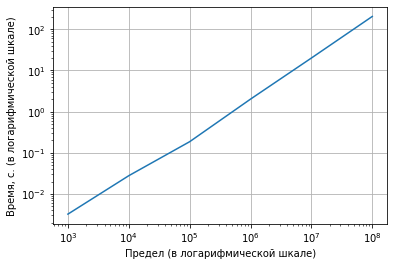

In [23]:
plt.plot([10**n for n in range(3,9)], times)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel("Предел (в логарифмической шкале)")
plt.ylabel("Время, с. (в логарифмической шкале)")
plt.show()

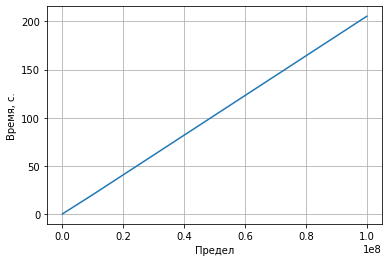

In [24]:
plt.plot([10**n for n in range(3,9)], times)
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.xlabel("Предел")
plt.ylabel("Время, с.")
plt.show()